# Часть 1

## Укажите число строк в полученной выборке:

Зайдите в базу данных и введите следующий код:
```
SELECT COUNT(*) FROM pulsar_stars 
WHERE (TARGET = 0 AND MIP BETWEEN Значение_1 AND Значение_2) OR 
(TARGET = 1 AND MIP BETWEEN Значение_1 AND Значение_2)
```

Где ``Значение_1`` и ``Значение_2`` являются ``MIP`` из задания.

## Определите выборочное среднее для столбца ``MIP``:

```
SELECT AVG(MIP) FROM pulsar_stars 
WHERE (TARGET = 0 AND MIP BETWEEN Значение_1 AND Значение_2) OR 
(TARGET = 1 AND MIP BETWEEN Значение_1 AND Значение_2)
```

## Определите выборочное среднее для столбца после нормировки:
```
SELECT * FROM pulsar_stars 
WHERE (TARGET = 0 AND MIP BETWEEN Значение_1 AND Значение_2) OR 
(TARGET = 1 AND MIP BETWEEN Значение_1 AND Значение_2)
```
И скачиваем в формате csv. Кладём в ту же директорию, где лежит этот юпитер-блокнот.

In [7]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('report.csv', usecols=['MIP','STDIP','EKIP','SIP','MC','STDC','EKC','SC'])
data = MinMaxScaler().fit_transform(data) #Находим выборочное среднее для MIP после нормировки
avr = data.mean(axis = 0)
avr[0]

0.5149678769584843

## Выполните классификацию новой звезды (с помощью логистической регрессии) с параметрами:

In [8]:
from sklearn.linear_model import LogisticRegression

y = pd.read_csv('report.csv', usecols = ['TARGET']) #Отбираем данные для предсказаний
reg = LogisticRegression(random_state = 2019).fit(data, y.values.ravel()) #Обучаем модель
#Вводим свои параметры в скобочки и получаем предсказание отнесения нашей звезды
#Первое число - вероятность отнесения к не пульсару, второе - к пульсару
reg.predict_proba([[0.598,0.748,0.809,0.913,0.667,0.608,0.473,0.731]])

array([[0.17550833, 0.82449167]])

Четвертое задание.

In [6]:
#Подключаем модуль для нахождения расстояния между соседями
from sklearn.neighbors import KNeighborsClassifier
#n_neigbours - количество соседей, p = 1 - Манхэттенское расстояние, p = 2 - евклидово
#Кол-во соседей ставим равное кол-ву звезд в полученной ранее выборке
neigh = KNeighborsClassifier(n_neighbors = 202, p = 2)
neigh.fit(data, y.values.ravel())
#Создаем нашу новую звездочку как самостоятельный независимый объект
Star = [0.598,0.748,0.809,0.913,0.667,0.608,0.473,0.731]
#Ищем расстояние до нашего ближайшего соседа в этом жестоком звездном мире
neigh.kneighbors([Star])[0][0][0]

1.1791119965888326

# Часть 2

## Введите количество главных компонент ``M``:

Необходимо 56 компонент(ы)


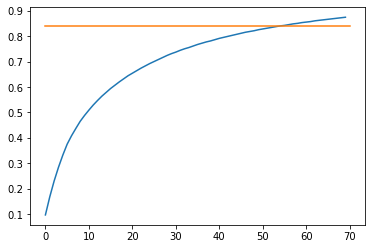

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

X_train = mnist.train_images()
y_train = mnist.train_labels()
dim = 784 # 28*28 
X_train = X_train.reshape(len(X_train), dim)
ev_ = 0.84 # доля объясненной дисперсии должна превышать это значение
M = 0
pca = PCA(n_components=70, svd_solver='full')
pca.fit(X_train)
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)
for i, ev in enumerate(explained_variance):
    if ev > ev_:
        M = i + 1
        break

plt.plot(np.arange(70), explained_variance)
plt.plot([0, 70], [0.84, 0.84]);
print(f' Необходимо {M} компонент(ы)')

## Введите выборочное среднее нулевой колонки для полученного тренировочного набора:

In [3]:
pca = PCA(n_components = M, svd_solver = 'full')
pca.fit(X_train)
X_test_transformed = pca.transform(X_train)
X_train, X_test, y_train, y_test = train_test_split(X_test_transformed, y_train, test_size = 0.3, random_state = 95) #подставить своё значение
print('Выборочное среднее нулевой колонки для полученного тренировочного набора')
print(sum([i[0] for i in X_train]) / len(X_train))

Выборочное среднее нулевой колонки для полученного тренировочного набора
2.9716173102804895


## Используя метод многоклассовой классификации ``One-vs-All`` ``OneVsRestClassifier()``, обучите алгоритм случайного леса ``RandomForestClassifier()`` с параметрами ``criterion='gini'``, ``min_samples_leaf=10``, ``max_depth=20``, ``n_estimators=10``, ``random_state=95``. Выполните оценку с помощью тестовых данных. Введите количество верно классифицированных объектов класса ``4`` для тестовых данных:

In [4]:
rfc = RandomForestClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, n_estimators=10, random_state=95) #подставить своё значение
clf = OneVsRestClassifier(rfc).fit(X_train, y_train)
y_pred = clf.predict(X_test)
CM = confusion_matrix(y_test, y_pred)
P = 4 #подставить своё значение
print(f'Число верно определенных классов {P}: {CM[P][P]}')

Число верно определенных классов 4: 1603


## Используя метод многоклассовой классификации ``One-vs-All OneVsRestClassifier()``, обучите алгоритм логистической регрессии ``LogisticRegression(solver='lbfgs', random_state=95)``. Остальные параметры оставьте по умолчанию. Выполните оценку с помощью тестовых данных.
Введите количество верно классифицированных объектов класса ``6`` для тестовых данных: 

In [9]:
reg = LogisticRegression(solver='lbfgs', random_state = 95).fit(data, y.values.ravel()) #подставить своё значение
clf = OneVsRestClassifier(reg).fit(X_train, y_train)
y_pred = clf.predict(X_test)
CM = confusion_matrix(y_test, y_pred)
P = 6 #подставить своё значение
print(f'Число верно определенных классов {P}: {CM[P][P]}')

Число верно определенных классов 6: 1715
